In [73]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [74]:
# loading dataset in notebook 
data=pd.read_csv("health_data.csv")

In [75]:
# first five rows of dataset
data.head(10)

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426
5,50.0,Male,Hypertension,107.00,171.80,25.33,95.21,5,233.10,203.67,5.48,1,0,5.01,4.65,0,7.25,6.35,ipsum,108.411983
6,80.0,Male,Hypertension,NaN,174.52,29.87,97.96,3,247.11,128.27,5.99,1,1,1.92,5.76,1,8.25,7.23,ipsum,7.009539
7,50.0,Male,Cancer,NaN,136.13,26.37,82.72,19,209.26,137.79,6.23,1,0,5.34,3.34,0,8.76,4.94,###,64.247308
8,60.0,Female,Obesity,NaN,NaN,35.49,98.62,3,264.69,194.21,6.83,0,0,1.66,2.99,0,5.93,5.87,lorem,45.855558
9,13.0,Female,Asthma,90.60,126.88,29.24,97.96,6,193.44,163.65,6.18,1,0,5.27,5.63,0,7.09,5.41,lorem,-45.916696


In [76]:
# total records in dataset 
print("Total records in dataset:",data.shape[0])
print("Total features in dataset:",data.shape[1])

Total records in dataset: 30000
Total features in dataset: 20


In [77]:
# dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                25500 non-null  float64
 1   Gender             25500 non-null  object 
 2   Medical Condition  25500 non-null  object 
 3   Glucose            25500 non-null  float64
 4   Blood Pressure     25500 non-null  float64
 5   BMI                30000 non-null  float64
 6   Oxygen Saturation  30000 non-null  float64
 7   LengthOfStay       30000 non-null  int64  
 8   Cholesterol        30000 non-null  float64
 9   Triglycerides      30000 non-null  float64
 10  HbA1c              30000 non-null  float64
 11  Smoking            30000 non-null  int64  
 12  Alcohol            30000 non-null  int64  
 13  Physical Activity  30000 non-null  float64
 14  Diet Score         30000 non-null  float64
 15  Family History     30000 non-null  int64  
 16  Stress Level       300

In [78]:
# checking for unique values 
unique_values={col:data[col].unique() for col in data.columns}
unique_values

{'Age': array([46., 22., 50., 57., 66., 80., 60., 13., 58., 32., 37., 74., 53.,
        45., 64., nan, 51., 63., 78., 82., 33., 62., 73., 25., 39., 86.,
        12., 52., 56., 41., 42., 55., 34., 24., 35., 72., 84., 79., 75.,
        54., 48., 30., 61., 49., 69., 31., 10., 70., 20., 77., 15., 71.,
        65., 23., 59., 83., 44., 28., 36., 38., 67., 85., 47., 81., 40.,
        68., 18., 89., 88., 76., 43., 27., 29., 21., 19., 26., 14., 87.,
        17., 11., 16.]),
 'Gender': array(['Male', nan, 'Female'], dtype=object),
 'Medical Condition': array(['Diabetes', 'Healthy', 'Asthma', 'Obesity', 'Hypertension',
        'Cancer', nan, 'Arthritis'], dtype=object),
 'Glucose': array([137.04,  71.58,  95.24, ..., 156.08, 119.96, 242.87]),
 'Blood Pressure': array([135.27, 113.27,    nan, ..., 169.77, 185.1 , 158.76]),
 'BMI': array([28.9 , 26.29, 22.53, ..., 44.79, 18.01, 39.47]),
 'Oxygen Saturation': array([ 96.04,  97.54,  90.31, ...,  83.75, 102.34,  84.96]),
 'LengthOfStay': array([ 6,  

In [79]:
# replacing unkwon letters like "###" , "??" with nan
data["random_notes"]=data["random_notes"].replace({"###":np.nan,"??":np.nan})

In [80]:
data.describe()

,Age,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,noise_col
count,25500.000000,25500.000000,25500.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,54.616784,123.622179,140.455337,28.476155,94.954992,4.414133,213.033891,176.837375,6.294377,0.279767,0.238533,3.803214,4.029654,0.439433,5.917312,6.229836,-0.517010
std,15.973618,41.576943,21.077933,5.728804,3.736202,2.761536,33.519757,48.812827,1.320269,0.448892,0.426194,2.011729,1.817165,0.496326,2.225057,1.187669,100.076959
min,10.000000,20.320000,74.240000,7.670000,67.510000,1.000000,95.730000,-22.480000,3.280000,0.000000,0.000000,-3.680000,-1.750000,0.000000,-2.440000,1.590000,-412.169596
25%,45.000000,96.280000,125.140000,24.590000,93.000000,3.000000,189.500000,141.280000,5.330000,0.000000,0.000000,2.350000,2.770000,0.000000,4.370000,5.410000,-68.270749
50%,55.000000,110.500000,138.320000,28.050000,95.300000,4.000000,211.835000,173.365000,5.970000,0.000000,0.000000,3.590000,3.790000,0.000000,5.900000,6.230000,-0.510742
75%,66.000000,136.610000,153.790000,31.810000,97.380000,5.000000,235.310000,208.630000,6.920000,1.000000,0.000000,5.060000,5.020000,1.000000,7.440000,7.050000,66.811399
max,89.000000,318.510000,226.380000,56.850000,110.070000,19.000000,358.370000,421.510000,12.360000,1.000000,1.000000,12.410000,12.060000,1.000000,15.450000,10.350000,467.894910


In [81]:
# checking null values
data.isnull().sum()[data.isnull().sum() > 0]

Age                   4500
Gender                4500
Medical Condition     4500
Glucose               4500
Blood Pressure        4500
random_notes         15122
dtype: int64

In [82]:
# checking null values more than 40%
data.isnull().sum()[data.isnull().sum() > data.shape[0]/100*40]

random_notes    15122
dtype: int64

In [83]:
# drop random_notes column because its contain more than 40% of null values
data.drop(["random_notes"],axis=1,inplace=True)

In [84]:
# drop missing values in target columns
data.dropna(subset=["Medical Condition"],inplace=True)

In [85]:
data.shape[0]

25500

In [86]:
def outliers_iqr(data,column): 
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)

    IQR= Q3 - Q1 

    LF= Q1 - 1.5 * IQR
    HF= Q3 + 1.5 * IQR

    outliers= data[(data[column] < LF) | (data[column] > HF)][column]
    return len(outliers),outliers.to_list()

In [87]:
outliers={col:outliers_iqr(data,col) for col in data.columns if data[col].dtype != "object"}

for col, (count, outlier_list) in outliers.items():
    print(f"Column: {col}")
    print(f"Outliers count: {count}")
    print(f"Outliers: {outlier_list}\n")

Column: Age
Outliers count: 136
Outliers: [13.0, 12.0, 12.0, 10.0, 12.0, 11.0, 10.0, 13.0, 12.0, 11.0, 10.0, 13.0, 10.0, 11.0, 10.0, 11.0, 13.0, 13.0, 10.0, 11.0, 13.0, 13.0, 11.0, 13.0, 12.0, 12.0, 13.0, 10.0, 10.0, 11.0, 12.0, 12.0, 13.0, 11.0, 13.0, 13.0, 12.0, 13.0, 13.0, 11.0, 11.0, 10.0, 12.0, 13.0, 12.0, 11.0, 11.0, 11.0, 10.0, 10.0, 13.0, 10.0, 12.0, 10.0, 13.0, 13.0, 10.0, 11.0, 10.0, 13.0, 12.0, 11.0, 13.0, 13.0, 10.0, 10.0, 12.0, 10.0, 11.0, 12.0, 12.0, 13.0, 13.0, 10.0, 11.0, 10.0, 11.0, 12.0, 10.0, 11.0, 10.0, 11.0, 13.0, 11.0, 10.0, 10.0, 13.0, 11.0, 13.0, 12.0, 13.0, 10.0, 12.0, 12.0, 11.0, 13.0, 12.0, 12.0, 11.0, 11.0, 10.0, 10.0, 13.0, 12.0, 11.0, 11.0, 10.0, 10.0, 12.0, 11.0, 11.0, 13.0, 11.0, 11.0, 11.0, 12.0, 12.0, 13.0, 13.0, 13.0, 10.0, 11.0, 13.0, 10.0, 11.0, 10.0, 10.0, 10.0, 13.0, 11.0, 10.0, 10.0, 13.0, 11.0, 12.0, 11.0]

Column: Glucose
Outliers count: 1866
Outliers: [204.82, 278.41, 219.73, 198.52, 223.9, 250.68, 197.78, 216.14, 243.31, 215.76, 222.06, 208.8

In [88]:
for col in data[["Age","Glucose","Blood Pressure"]]: 
    mean=data[col].median()
    data[col].fillna(mean,inplace=True)

In [89]:
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)

In [90]:
data.isnull().sum()

Age                  0
Gender               0
Medical Condition    0
Glucose              0
Blood Pressure       0
BMI                  0
Oxygen Saturation    0
LengthOfStay         0
Cholesterol          0
Triglycerides        0
HbA1c                0
Smoking              0
Alcohol              0
Physical Activity    0
Diet Score           0
Family History       0
Stress Level         0
Sleep Hours          0
noise_col            0
dtype: int64

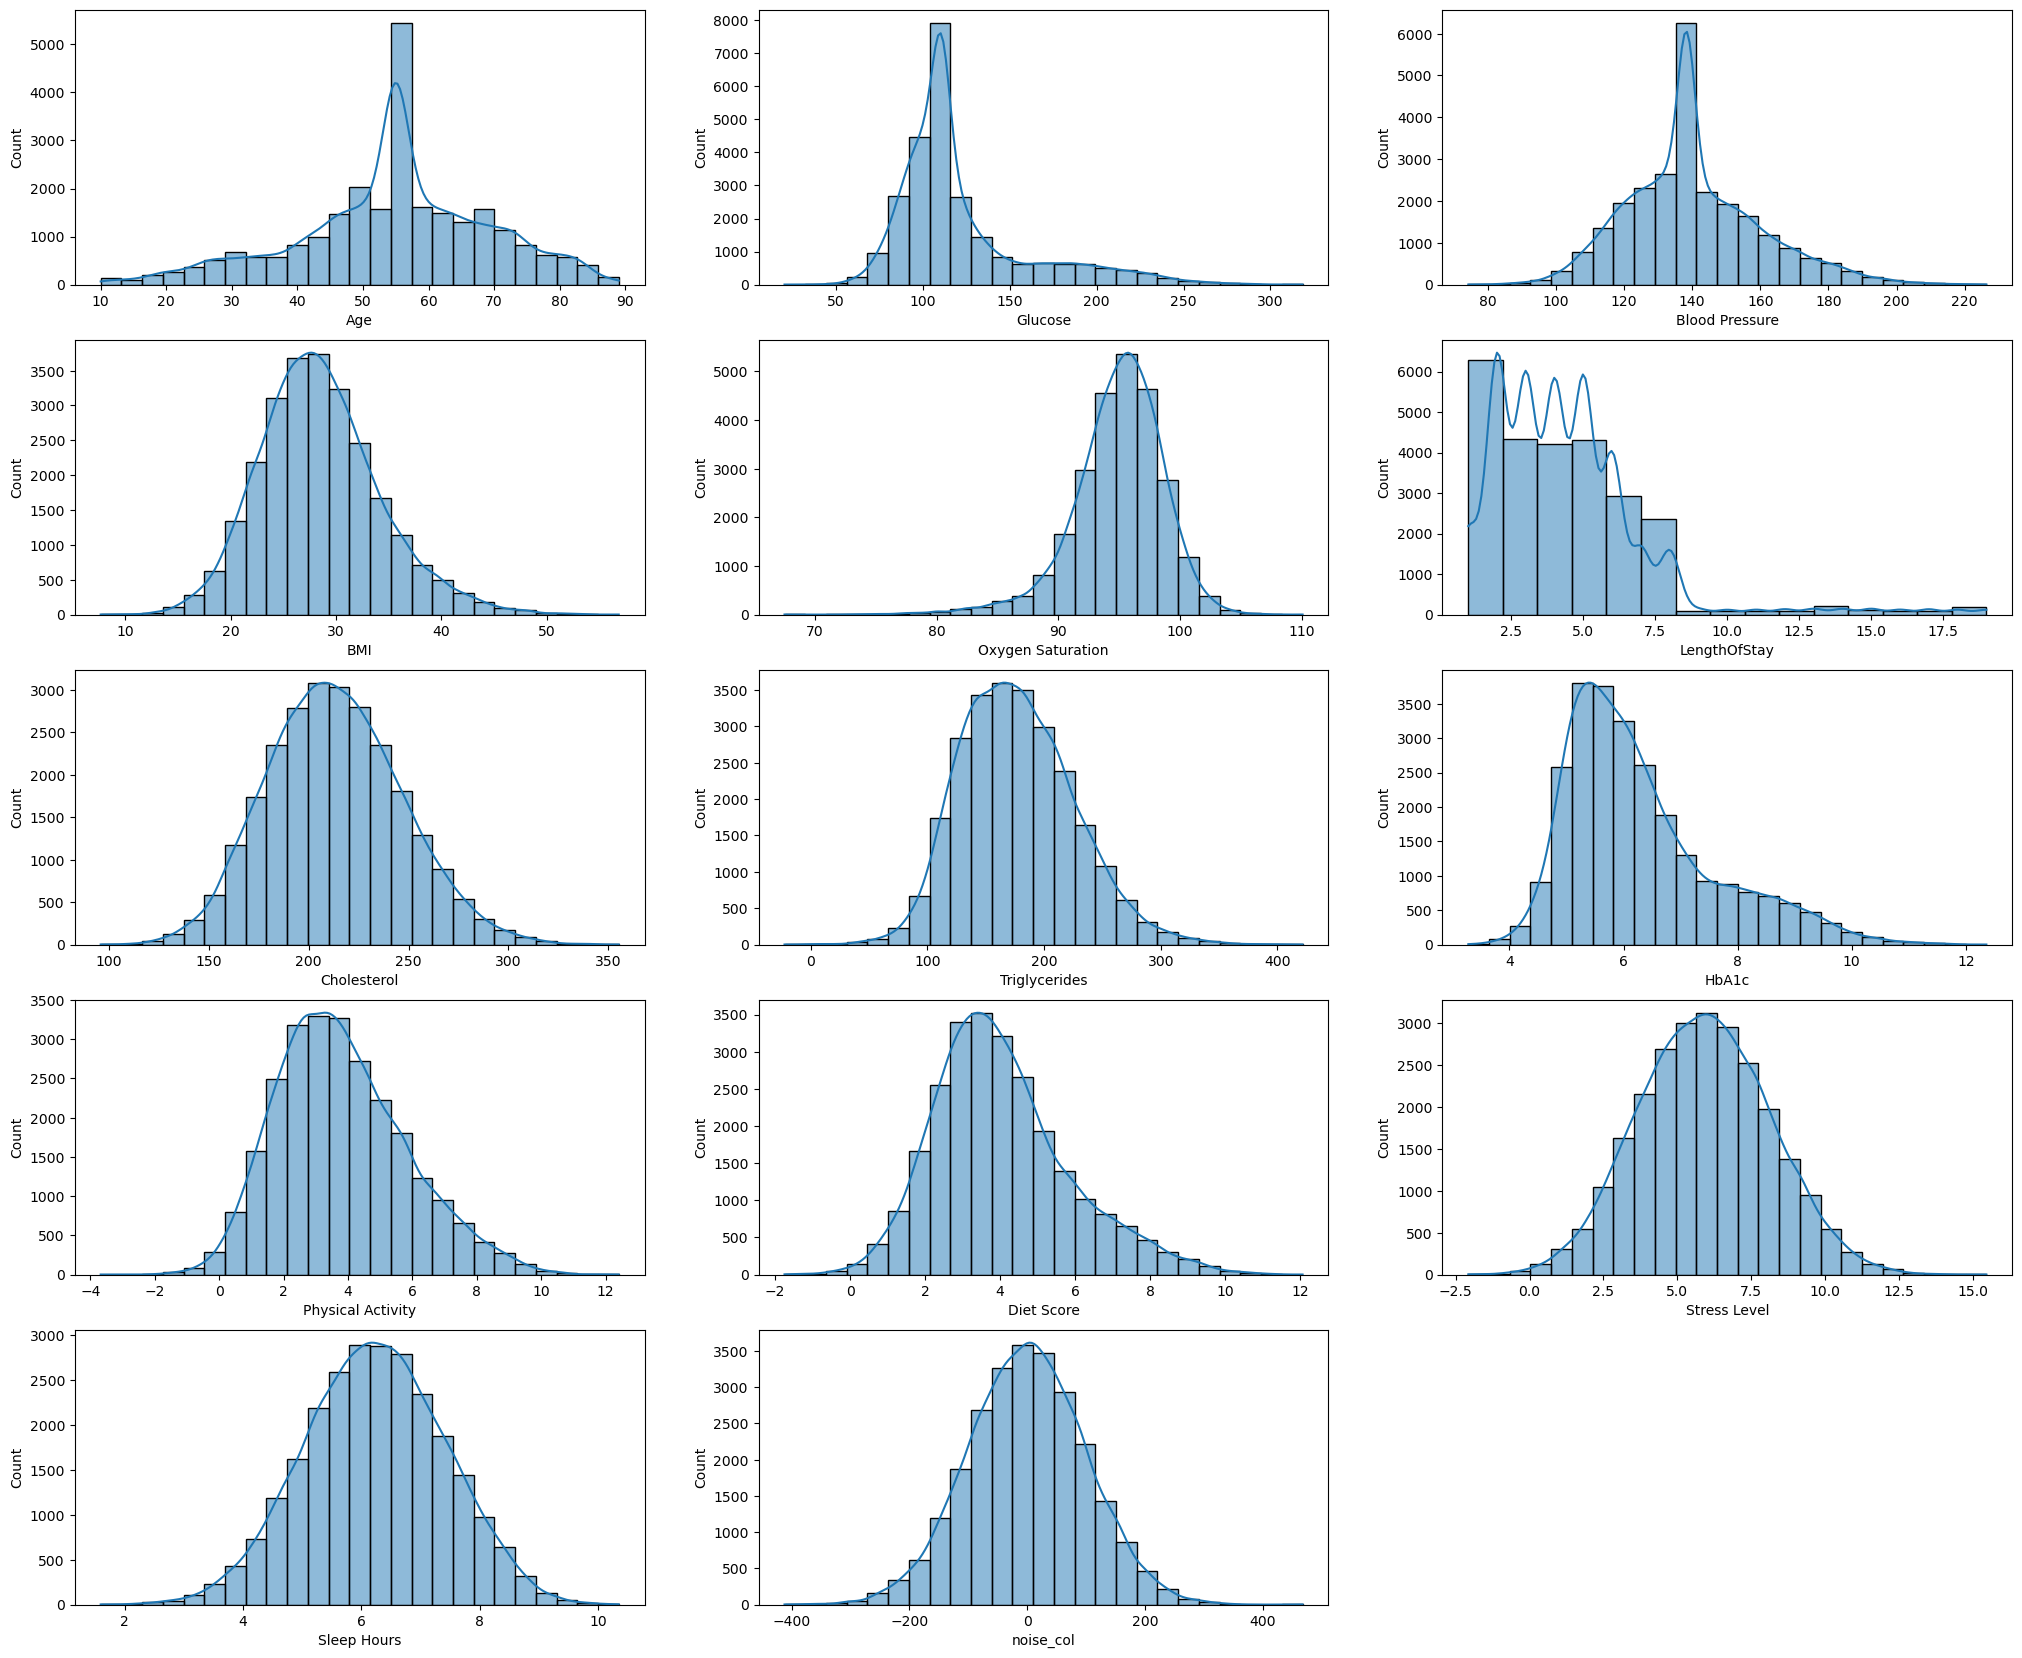

In [91]:
plt.figure(figsize=(25,25))
plt.subplot(6,3,1)
sns.histplot(data["Age"],kde=True,bins=25)
plt.subplot(6,3,2)
sns.histplot(data["Glucose"],kde=True,bins=25)
plt.subplot(6,3,3)
sns.histplot(data["Blood Pressure"],kde=True,bins=25)
plt.subplot(6,3,4)
sns.histplot(data["BMI"],kde=True,bins=25)
plt.subplot(6,3,5)
sns.histplot(data["Oxygen Saturation"],kde=True,bins=25)
plt.subplot(6,3,6)
sns.histplot(data["LengthOfStay"],kde=True,bins=15)
plt.subplot(6,3,7)
sns.histplot(data["Cholesterol"],kde=True,bins=25)
plt.subplot(6,3,8)
sns.histplot(data["Triglycerides"],kde=True,bins=25)
plt.subplot(6,3,9)
sns.histplot(data["HbA1c"],kde=True,bins=25)
plt.subplot(6,3,10)
sns.histplot(data["Physical Activity"],kde=True,bins=25)
plt.subplot(6,3,11)
sns.histplot(data["Diet Score"],kde=True,bins=25)
plt.subplot(6,3,12)
sns.histplot(data["Stress Level"],kde=True,bins=25)
plt.subplot(6,3,13)
sns.histplot(data["Sleep Hours"],kde=True,bins=25)
plt.subplot(6,3,14)
sns.histplot(data["noise_col"],kde=True,bins=25)
plt.show()

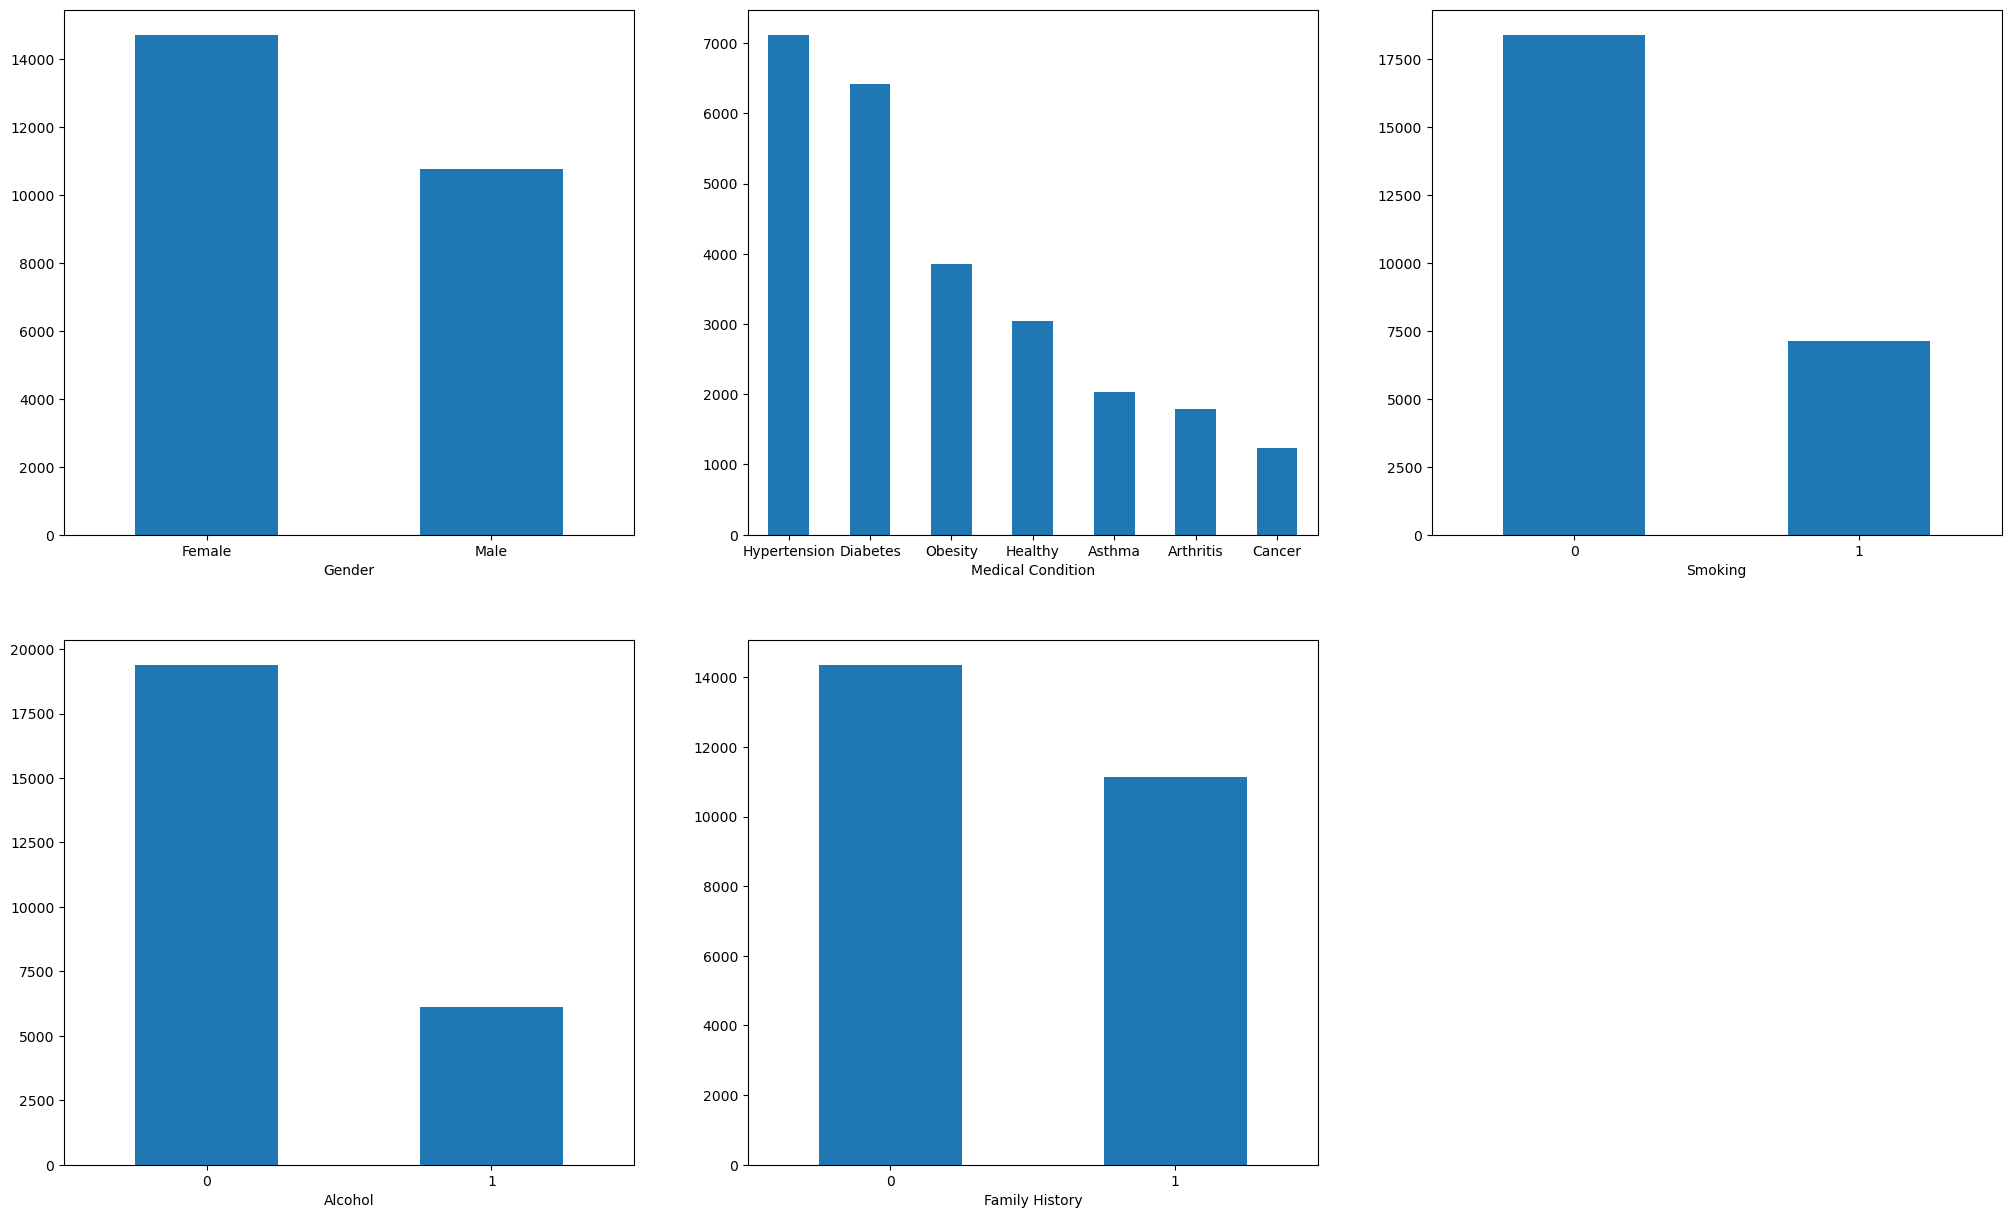

In [92]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
data["Gender"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(2,3,2)
data["Medical Condition"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(2,3,3)
data["Smoking"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(2,3,4)
data["Alcohol"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.subplot(2,3,5)
data["Family History"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

In [93]:
data["Medical Condition"].value_counts()

Medical Condition
Hypertension    7120
Diabetes        6417
Obesity         3857
Healthy         3039
Asthma          2037
Arthritis       1796
Cancer          1234
Name: count, dtype: int64

In [94]:
# encoding categorical data to numeric
data["Medical Condition"]=data["Medical Condition"].replace({
    "Hypertension":0,
    "Diabetes":1,
    "Obesity":2,
    "Healthy":3,
    "Asthma":4,
    "Arthritis":5,
    "Cancer":6})


In [95]:
from sklearn.preprocessing import LabelEncoder 
encode_gender=LabelEncoder()

data["Gender"]=encode_gender.fit_transform(data["Gender"])

In [96]:
data.head()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,noise_col
0,46.0,1,1,137.04,135.270,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,-137.057211
1,22.0,1,3,71.58,113.270,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,-11.230610
2,50.0,0,4,95.24,138.285,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,98.331195
3,57.0,0,2,110.51,130.530,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,44.187175
4,66.0,0,0,95.15,178.170,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,44.831426


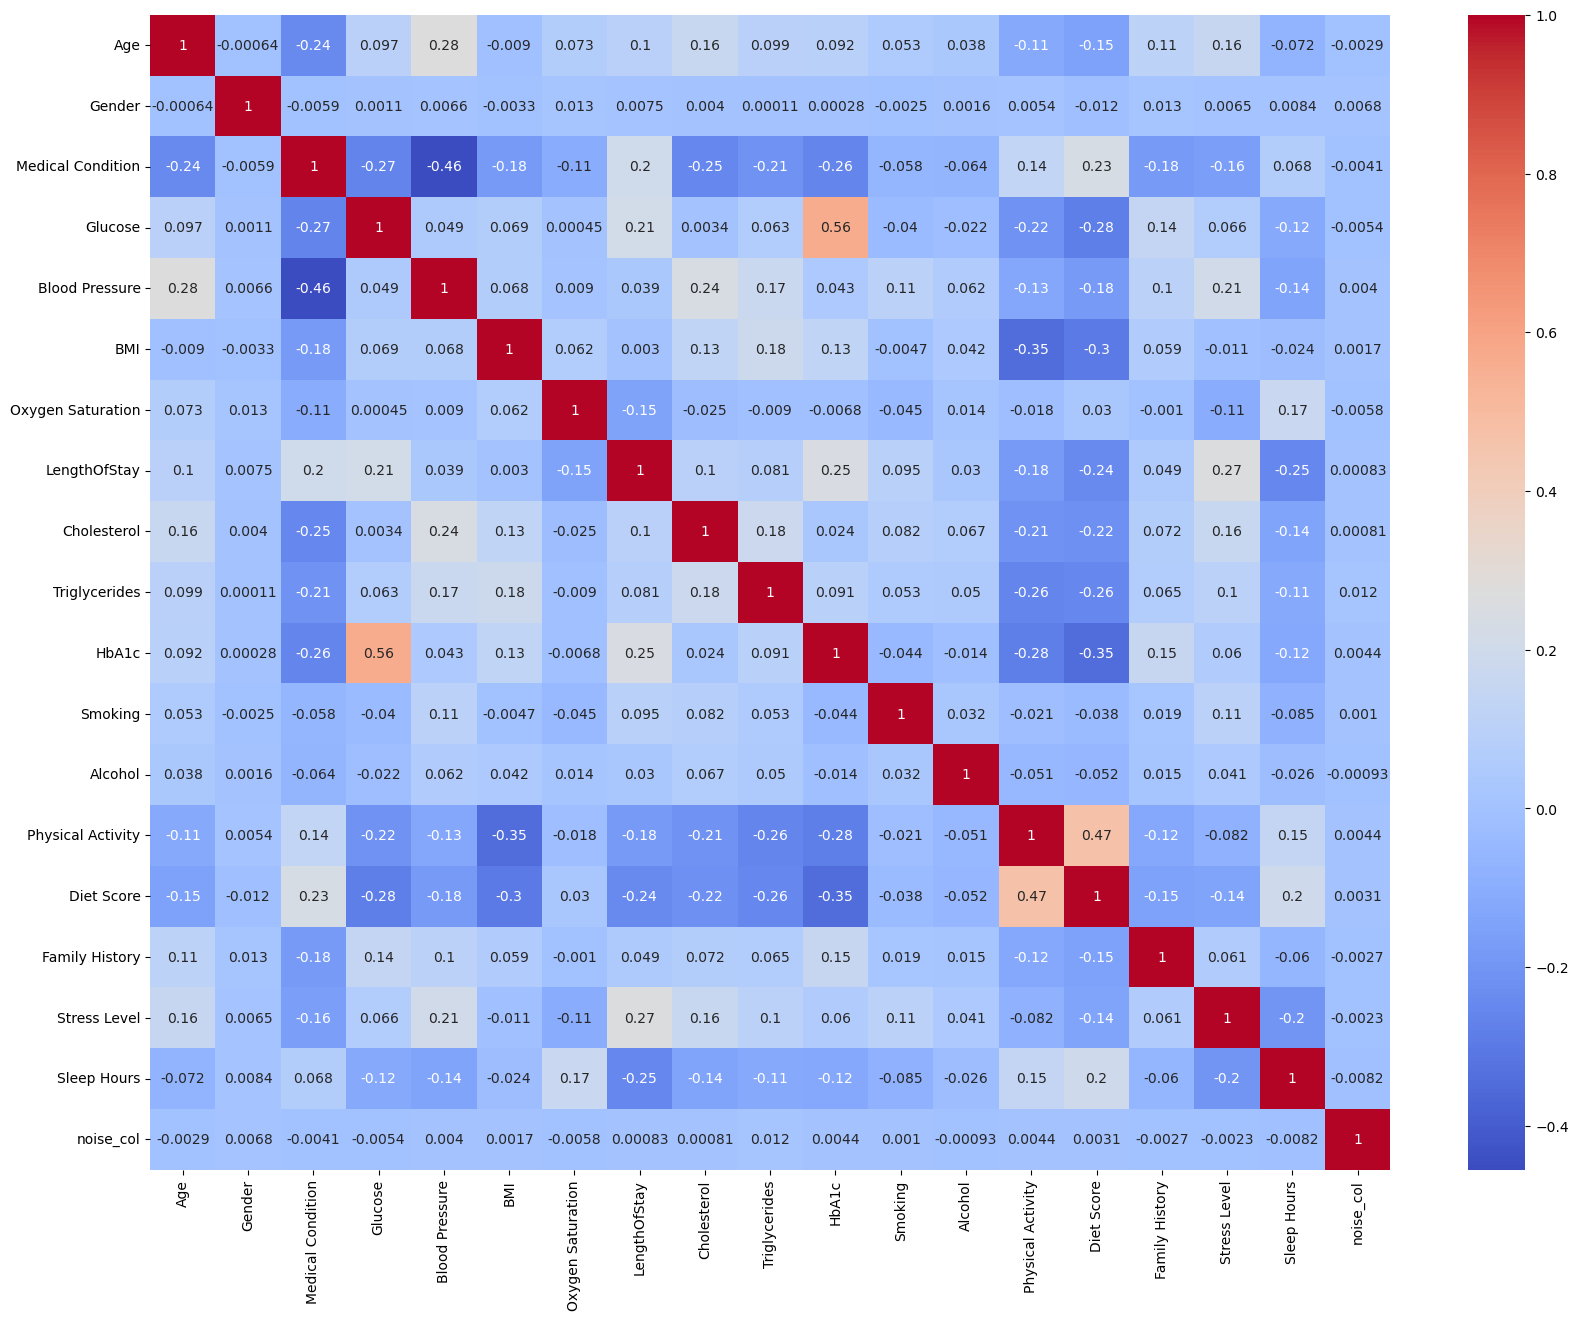

In [97]:
corr=data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [98]:
data.drop(["noise_col","Gender"],axis=1,inplace=True)

In [99]:
x=data.drop(["Medical Condition"],axis=1)
y=data["Medical Condition"]

In [100]:
from sklearn.model_selection import train_test_split 
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [101]:
train_y.value_counts()

Medical Condition
0    5662
1    5181
2    3069
3    2447
4    1597
5    1456
6     988
Name: count, dtype: int64

In [102]:
from imblearn.over_sampling import SMOTE
sampling=SMOTE()
sample_train_x,sample_train_y=sampling.fit_resample(train_x,train_y)

In [103]:
sample_train_y.value_counts()

Medical Condition
1    5662
3    5662
2    5662
5    5662
0    5662
4    5662
6    5662
Name: count, dtype: int64

In [104]:
from sklearn.preprocessing import StandardScaler 
scale=StandardScaler()
scale_train_x=scale.fit_transform(sample_train_x)
scale_test_x=scale.transform(test_x)

In [105]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier 
from sklearn.neighbors import KNeighborsClassifier

In [106]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score

In [107]:
def get_metrics(actual,predicted): 
    acc=accuracy_score(actual,predicted)
    cf=confusion_matrix(actual,predicted)
    pr=precision_score(actual,predicted,average='weighted')
    rc=recall_score(actual,predicted,average='weighted')
    f1=f1_score(actual,predicted,average='weighted')
    return acc,cf,pr,rc,f1

In [108]:
models={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "XGBClassifier":XGBClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier()
}

for i in range(len(list(models))): 
    model=list(models.values())[i]
    model.fit(scale_train_x,sample_train_y)

    train_pred=model.predict(scale_train_x)
    test_pred=model.predict(scale_test_x)

    train_acc,train_cf,train_pr,train_rc,train_f1=get_metrics(sample_train_y,train_pred)
    test_acc,test_cf,test_pr,test_rc,test_f1=get_metrics(test_y,test_pred)

    print(list(models.keys())[i])
    print("*"*30)
    print("Training dataset:")
    print("-"*30)
    print("accuracy score:",train_acc)
    print("confusion matrix:\n",train_cf)
    print("precision score:",train_pr)
    print("recall score:",train_rc)
    print("f1 score:",train_f1)
    print("-"*50)
    print("Testing dataset:")
    print("-"*30)
    print("accuracy score:",test_acc)
    print("confusion matrix:\n",test_cf)
    print("precision score:",test_pr)
    print("recall score:",test_rc)
    print("f1 score:",test_f1)
    print("="*80)
    print("\n")


LogisticRegression
******************************
Training dataset:
------------------------------
accuracy score: 0.9252914164606146
confusion matrix:
 [[4753  138  169    5  126  466    5]
 [ 136 5319  110    0    7   43   47]
 [ 140   83 5132    0   38  269    0]
 [   1    0    0 5640   13    8    0]
 [ 105    7   40   38 5355  112    5]
 [ 445   16  256    0   70 4875    0]
 [  23   24    0    0   13    3 5599]]
precision score: 0.9254924395532875
recall score: 0.9252914164606146
f1 score: 0.9253662666980874
--------------------------------------------------
Testing dataset:
------------------------------
accuracy score: 0.8850980392156863
confusion matrix:
 [[1198   43   41    1   36  137    2]
 [  28 1156   27    0    5   11    9]
 [  37   27  679    0    6   39    0]
 [   0    0    0  583    8    1    0]
 [  15    1    8    2  407    6    1]
 [  51    2   26    0    8  253    0]
 [   1    4    0    0    3    0  238]]
precision score: 0.8924311947662862
recall score: 0.8850980392

In [109]:
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import StratifiedKFold

In [111]:
cv=StratifiedKFold()

In [121]:
gb=GradientBoostingClassifier() 

learning_rate=[0.1,0.01,1]
n_estimators=[int(x) for x in np.linspace(start=20,stop=30,num=3)]
max_depth=[int(x) for x in np.linspace(start=10,stop=30,num=3)]
min_samples_split=[2,3]
min_samples_leaf=[2,3]

params_gb=dict(learning_rate=learning_rate,n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)

gb_tun=RandomizedSearchCV(estimator=gb,param_distributions=params_gb,n_iter=2,n_jobs=-1,cv=cv,verbose=3)


gb_tun.fit(scale_train_x,sample_train_y)

train_pred=gb_tun.predict(scale_train_x)
test_pred=gb_tun.predict(scale_test_x)

train_acc,train_cf,train_pr,train_rc,train_f1=get_metrics(sample_train_y,train_pred)
test_acc,test_cf,test_pr,test_rc,test_f1=get_metrics(test_y,test_pred)

print("*"*30)
print("Training dataset:")
print("-"*30)
print("accuracy score:",train_acc)
print("confusion matrix:\n",train_cf)
print("precision score:",train_pr)
print("recall score:",train_rc)
print("f1 score:",train_f1)
print("-"*50)
print("Testing dataset:")
print("-"*30)
print("accuracy score:",test_acc)
print("confusion matrix:\n",test_cf)
print("precision score:",test_pr)
print("recall score:",test_rc)
print("f1 score:",test_f1)
print("="*80)
print("\n")
print(gb_tun.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
******************************
Training dataset:
------------------------------
accuracy score: 0.9935408992279356
confusion matrix:
 [[5572    7   22    0   13   48    0]
 [  26 5619    9    0    1    7    0]
 [  15    2 5603    0    3   39    0]
 [   0    0    0 5661    0    1    0]
 [   9    0    0    0 5642   11    0]
 [   8    2   30    0    3 5619    0]
 [   0    0    0    0    0    0 5662]]
precision score: 0.9935609783949496
recall score: 0.9935408992279356
f1 score: 0.9935443435221484
--------------------------------------------------
Testing dataset:
------------------------------
accuracy score: 0.9133333333333333
confusion matrix:
 [[1289   25   26    3   22   93    0]
 [  26 1175   16    0    5    5    9]
 [  24   16  708    0   13   27    0]
 [   0    0    0  581   10    1    0]
 [  22    0    8    3  405    2    0]
 [  52    2   21    0    5  260    0]
 [   0    6    0    0    0    0  240]]
precision score: 0.91